<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تعریف متریک بر اساس داده خام
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    بخشی از وظایف یک تحلیلگر داده، تعریف متریک بر اساس داده خام است. این متریک‌ها به کسب و کار کمک می‌کند شهور خوبی از وضعیت خود در بازار پیدا کند و بتواند برای رشد برنامه‌بریزد.
    <br>
    
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [2]:
# Common Modules
import datetime, gc
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت و معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
کدهای زیر بخشی از صورت مسئله هستند، بنابراین با خیال راحت از آن‌ها گذر کنید :)    
</font>
</p>

In [3]:
# Parameters
p_male = 0.4
n_users = 1000  # Lower this to 200 if you run out of RAM
rng = np.random.default_rng(135)

# Users
users_is_males = rng.random(n_users) <= p_male
users_rates = 0.1 + rng.exponential(1.5, n_users).round(1)
users_success = 1.0 - np.exp(-(users_rates/2.0+rng.random(n_users)/10.0)).round(2)
users_payments = 10.0 + np.abs( rng.normal(100.0, 50.0, n_users) )

# Data Generation
date_begin, dt = datetime.datetime(2021,1,1), datetime.timedelta(seconds=1)
data = []
for _id, (user_is_male, user_rate, user_success, user_payment) in enumerate(
        zip(users_is_males, users_rates, users_success, users_payments)
    ):
    _n = int(5*365*user_rate+10**3)
    times = rng.exponential(1/user_rate, _n).cumsum()
    successes = rng.random(_n) <= user_success
    payments = 10.0 + np.abs( rng.normal(user_payment, 20.0, _n) ).round(1)
    for _time, _success, _payment in zip(times, successes, payments):
        if _time >= 365:
            break
        _date = date_begin + int(_time*24*3600) * dt
        data.append((_id, 'M' if user_is_male else 'F', _time, _date, _success, _payment))
df = pd.DataFrame(
    data = data,
    columns=['id', 'gender', 'time', 'date', 'success', 'payment']
).sort_values(['time']).reset_index(drop=True)
# Cleanup
del data, date_begin, dt
del user_is_male, user_rate, user_success, user_payment
del rng, n_users, users_rates, users_success, users_is_males, users_payments
_ = gc.collect()
print("Number of Records Generated: {}".format(len(df)))

Number of Records Generated: 575297


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مشاهده مجموعه داده
</font>
</h3>


In [4]:
df

,id,gender,time,date,success,payment
0,488,M,0.000276,2021-01-01 00:00:23,True,98.6
1,628,M,0.001344,2021-01-01 00:01:56,True,142.3
2,125,M,0.001555,2021-01-01 00:02:14,True,105.9
3,842,M,0.001625,2021-01-01 00:02:20,True,102.1
4,994,M,0.002109,2021-01-01 00:03:02,True,98.3
...,...,...,...,...,...,...
575292,667,F,364.997823,2021-12-31 23:56:51,False,55.7
575293,712,F,364.997878,2021-12-31 23:56:56,True,155.0
575294,918,F,364.998842,2021-12-31 23:58:19,True,118.6
575295,791,F,364.999113,2021-12-31 23:58:43,True,47.1



<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|id|عدد متمایزی برای هر کاربر هست. مثلا کد ملّی (یکتا شده)|
|gender|نشان دهنده جنسیت کاربر|
|time|زمان نسبی تراکنش از اول سال بر اساس روز. صفر یعنی اولین لحظه‌ی سال و ۳۶۵ یعنی آخرین لحظه‌ی سال|
|data|زمان تقویمی/ساعتی انجام تراکنش.|
|success|آیا تراکنش موفق بوده؟ یک تراکنش ناموفق یعنی انجام نشده است و پولی پرداخت نشده.|
|payment|میزان پولی که در تراکنش قصد پرداخت داشته|
    
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تراکنش: یعنی یک عملیات برای پرداخت شروع شده و پایان یافته است. مثلا وارد شدن به درگاه بانکی که در نهایت می‌تواند موفق یا ناموفق باشد.
    <br>
تراکنش‌های موفق را به عنوان درآمد در نظر بگیرید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین: متریکی تعریف کنید که درآمد را نشان دهد
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    <ol style="direction: rtl; text-align: justify;">
        <li>با تعریف درآمد روزانه شروع کنید</li>
        <li>نمودار درآمد/پرداختی روزانه بر اساس هر روز را رسم کنید</li>
        <li>متریکی برای درآمد تعریف کنید که واریانس پایین‌تری داشته باشد</li>
        <li>تمرین بیش‌تر: آیا متریک دیگری می‌توانید تعریف کنید که شهودی از وضعیت پرداخت بدهد؟</li>
    </ol>
</font>
</p>



<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    نمودار مجموع مالی همه تراکنش‌ها در هر روز از سال
</font>
</h3>


In [5]:
# Code Here :)
df['day'] = df.date.dt.day_of_year

grouping = df.groupby('day')
payment_per_day = grouping.payment.sum()

Text(0.5, 1.0, 'Payment/day')

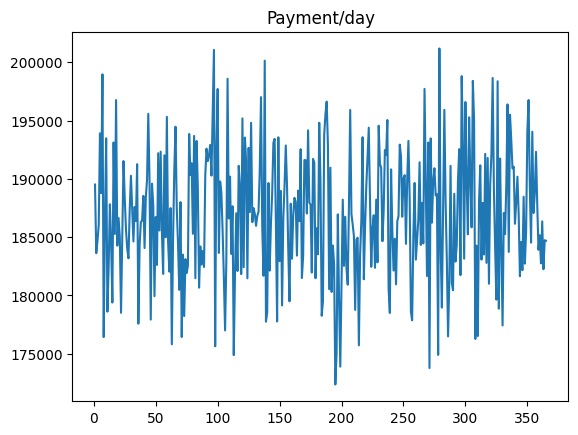

In [6]:
fig, ax = plt.subplots()

ax.plot(payment_per_day);
ax.set_title('Payment/day')


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    نمودار مجموع مالی تراکنش‌های موفق در هر روز از سال
</font>
</h3>


In [6]:
grouping = df[df.success==1].groupby('day')
profit_per_day = grouping.payment.sum()

Text(0.5, 1.0, 'Profit/day')

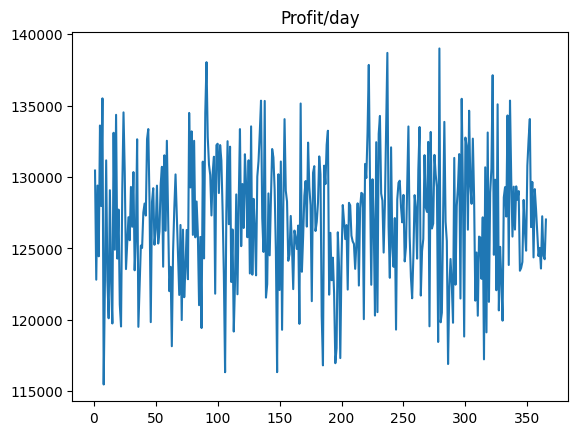

In [7]:
fig, ax = plt.subplots()

ax.plot(profit_per_day);
ax.set_title('Profit/day')


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    نمودار نسبت مجموع مالی تراکنش‌های موفق به همه تراکنش‌ها در هر روز از سال
</font>
</h3>


In [8]:
grouping = df.groupby(['day'])
profit_ratio_per_day = grouping.apply(lambda g : g[g.success==True].payment.sum() / g.payment.sum())


Text(0.5, 1.0, 'Profit_ratio/day')

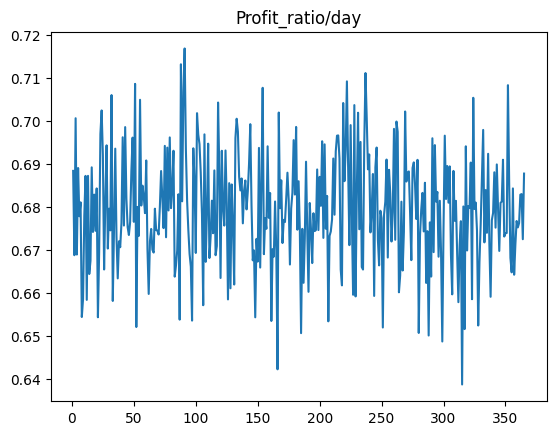

In [9]:
fig, ax = plt.subplots()

ax.plot(profit_ratio_per_day);
ax.set_title('Profit_ratio/day')


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    نمودار مجموع مالی تراکنش‌های موفق در هر ماه از سال
</font>
</h3>


In [10]:
df['month'] = df.date.dt.month
grouping = df.groupby(['month'])

payment_per_month = grouping.apply(lambda g : g[g.success==True].payment.sum())


Text(0.5, 1.0, 'Profit/month')

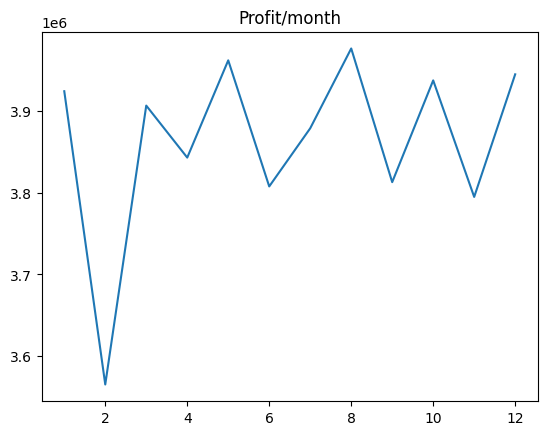

In [11]:
fig, ax = plt.subplots()

ax.plot(payment_per_month.index, payment_per_month.values);
ax.set_title('Profit/month')


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
     مقایسه مجموع مالی تراکنش‌های موفق و ناموفق ماهانه در دو نمودار خطی و میله‌ای
</font>
</h3>


In [12]:
grouping = df.groupby(['month'])
failed_payment_per_month = grouping.apply(lambda g : g[g.success==False].payment.sum())
failed_payment_per_month

month
1     1862910.4
2     1669658.3
3     1842038.6
4     1798433.6
5     1856994.6
6     1799654.3
7     1856124.7
8     1818153.7
9     1798620.2
10    1876204.1
11    1824599.2
12    1870584.1
dtype: float64

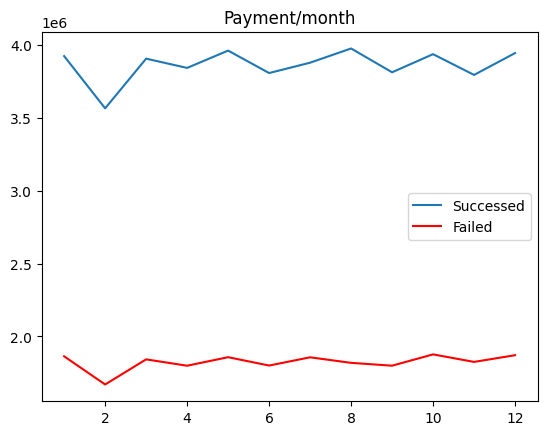

In [13]:
fig, ax = plt.subplots()

ax.plot(payment_per_month.index, payment_per_month.values, label='Successed');
ax.plot(failed_payment_per_month.index, failed_payment_per_month.values, c='red', label='Failed');
ax.set_title('Payment/month')
ax.legend()

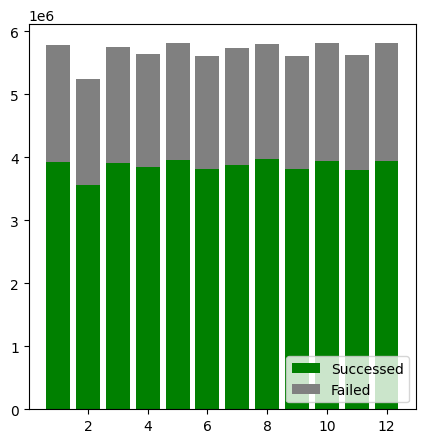

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(payment_per_month.index, payment_per_month.values, color='green', label='Successed')
ax.bar(payment_per_month.index, failed_payment_per_month.values, color='gray', bottom=payment_per_month.values, label='Failed')
ax.legend(loc='lower right')


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
معیار جدیدی تحت عنوان نسبت پرداخت موفق به پرداخت ناموفق تعریف میکنیم.
    <br>
    نمودار این معیار جدید را بر حسب ماه رسم میکنیم
</font>
</h3>


In [15]:
grouping = df.groupby(['month'])
profit_over_failed_per_month = grouping.apply(lambda g : g[g.success==True].payment.sum() / g[g.success==False].payment.sum())

<AxesSubplot:xlabel='month'>

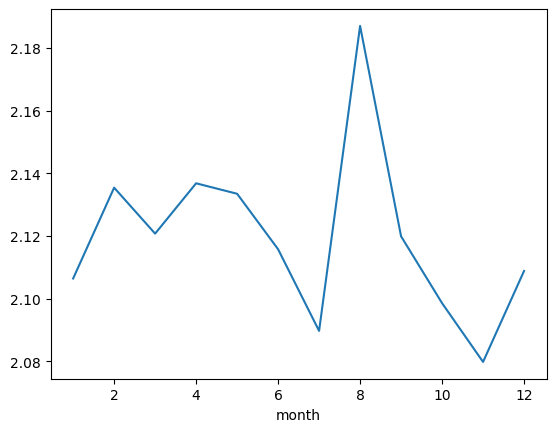

In [16]:
profit_over_failed_per_month.plot()


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
معیار جدیدی تحت عنوان تعداد پرداخت‌های موفق تعریف میکنیم.
    <br>
    نمودار این معیار جدید را بر حسب ماه رسم میکنیم
</font>
</h3>


<AxesSubplot:xlabel='month'>

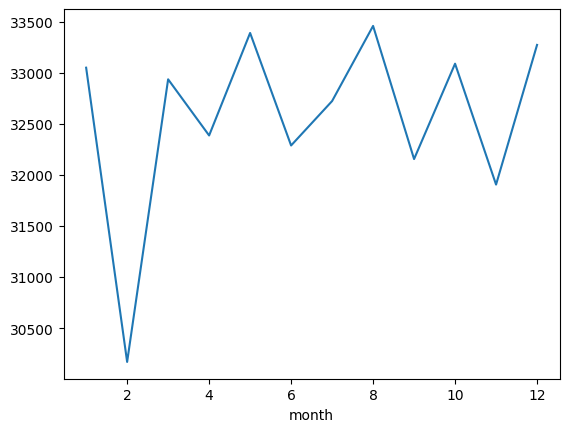

In [17]:
grouping = df.groupby(['month'])
count_profit_over_failed_per_month = grouping.apply(lambda g : len(g[g.success==True]) )
count_profit_over_failed_per_month.plot()


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
     مقایسه مجموع مالی تراکنش‌های موفق و ناموفق فصلی در نمودار خطی
</font>
</h3>


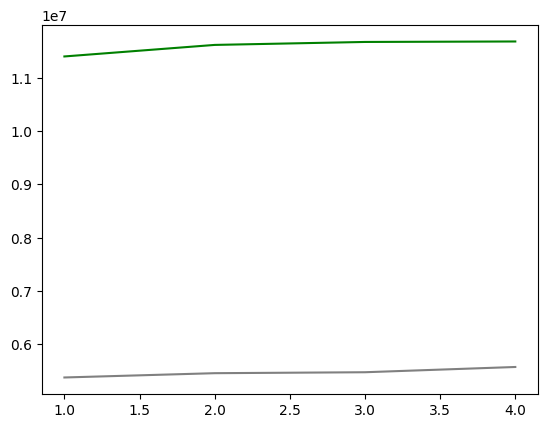

In [18]:
df['quarter'] = df.date.dt.quarter
grouping = df.groupby(['quarter'])
successed_payment_per_quarter = grouping.apply(lambda g : g[g.success==True].payment.sum())
failed_payment_per_quarter = grouping.apply(lambda g : g[g.success==False].payment.sum())

fig, ax = plt.subplots()

ax.plot(successed_payment_per_quarter.index, successed_payment_per_quarter.values, color='green')
ax.plot(successed_payment_per_quarter.index, failed_payment_per_quarter.values, color='gray',)


<h3 dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مقایسه توزیع مقدار پرداختی به ازای جنسیت‌های مرد و زن    
</font>
</h3>


d:\projects\quera\data analysis bootcamp\1401-09\practices\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\projects\quera\data analysis bootcamp\1401-09\practices\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


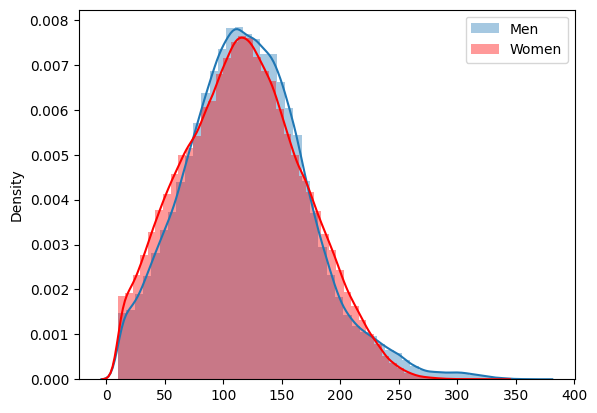

In [19]:
fig, ax = plt.subplots()
data = df[df.success==True]
sns.distplot(x=data[data.gender=='M'].payment, ax=ax, label='Men')
sns.distplot(x=data[data.gender=='F'].payment, ax=ax, color='red', label='Women')
ax.legend(loc='upper right')